# Transformers

Os Transformers representam o estado da arte em tecnologia para processamento de linguagem natural (NLP). Introduzidos pelo paper "Attention is All You Need" em 2017, essa arquitetura revolucionou o campo ao usar mecanismos de atenção para capturar relações contextuais profundas entre palavras, frases e até mesmo documentos inteiros.

Uma de suas principais vantagens é a possibilidade de utilizar modelos pré-treinados, como BERT e GPT, que podem ser ajustados (fine-tuning) para tarefas específicas, como análise de sentimentos, tradução automática ou geração de texto. Essa flexibilidade tornou os Transformers indispensáveis em diversas aplicações, desde chatbots até sistemas de busca inteligentes.

Os Transformers utilizam uma arquitetura baseada em dois componentes principais: Encoder e Decoder (ENDEC). O Encoder processa a entrada, convertendo-a em uma representação interna que o modelo pode entender, capturando relações contextuais entre as palavras. O Decoder, por sua vez, utiliza essa representação para gerar a saída, como a tradução de um texto ou a continuação de uma frase. Essa estrutura modular é altamente flexível e pode ser adaptada para diferentes tarefas, seja utilizando apenas o Encoder (como no BERT), apenas o Decoder (como no GPT) ou ambos em conjunto (como no Transformer original).

## Modelos de Atenção

Os mecanismos de atenção são componentes fundamentais dos modelos Transformers. Eles permitem que o modelo foque seletivamente em partes específicas de uma sequência de entrada (como palavras em uma frase) ao processá-la.

A ideia principal é atribuir pesos diferentes a cada elemento da sequência, dependendo de sua relevância para a tarefa em questão. Isso ajuda o modelo a captar melhor as relações contextuais entre palavras, independentemente da distância entre elas na frase.


## Fluxograma

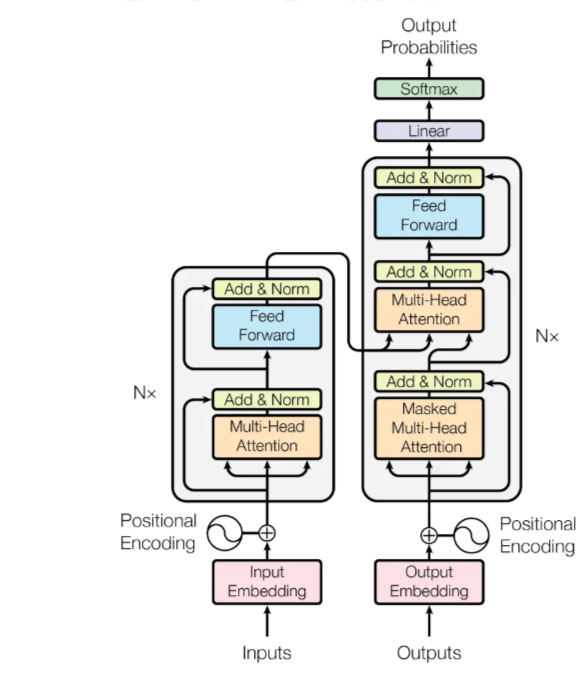

## Encoders

### Embedding e Positional Encoder

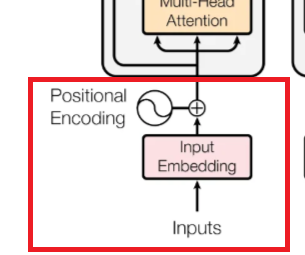

### Embedding

A ideia é transformar representações simbólicas (como palavras) em vetores que possam ser usados pelo modelo. Esses vetores contêm informações semânticas e sintáticas sobre as palavras, permitindo que o modelo entenda suas relações. 

No embedding, a palavra é representada como um vetor baseado em seu significado geral, independente do contexto específico da frase em que aparece. É como um "significado básico" da palavra no idioma, antes de levar em conta como ela interage com outras palavras na frase.

### Positional Encoder

É uma matriz que vai informar para o processo do transformer a posição das palavras (uma vez que processamento de linguagem natural necessita de ordem). A maioria das técnicas dependem de recorrência, mas o **positional encoder** submete todo o texto **em paralelo**, tornando-o mais performático e melhorando o aprendizado (já que diversos mecanismos de attention serão treinados simultaneamente). Essa técnica utiliza funções matemáticas, como senos e cossenos, para representar as posições, o que facilita o aprendizado dos mecanismos de atenção treinados simultaneamente.


### Embedding + Positional Encoder

No Transformer, o embedding e o positional encoding são representados como matrizes do mesmo tamanho, e esses dois componentes são somados para criar a entrada final que será processada pelo modelo. Vamos detalhar:

- Matriz Embedding :
Cada palavra (ou token) é transformada em um vetor de dimensão fixa, digamos 𝑑 (por exemplo, 512 ou 768 dimensões). Se o texto tem N palavras, o embedding gerará uma matriz de dimensão N x 𝑑.

 - Positional Encoding Matrix: O positional encoding também gera uma matriz de dimensão N x 𝑑, onde N é o número de palavras na sequência e é o mesmo tamanho usado no embedding. Isso garante que ambas as matrizes possam ser somadas diretamente.

A soma é feita posição por posição (element-wise addition) na matriz. Assim, para cada palavra/token, o vetor embedding da palavra é combinado com o vetor do positional encoding que indica sua posição na sequência.



Um modelo Transformer pode ter N encoders, ou seja, ele pode ser composto por múltiplas camadas de Encoder no seu lado esquerdo (lado de entrada). Cada Encoder processa a entrada em sequência, e o número de encoders é um hiperparâmetro que pode ser ajustado durante o design do modelo.

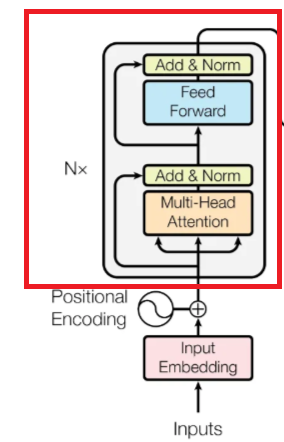

### Self Attention

A primeira etapa dos Encoders é o **Multi-head Attention**, porém, para isso é necessário entender o **Self Attention**. O Self Attention é o mecanismo principal de um transformer. Esse mecanismo tem por funcao descobrir a relacao das palavras, por exemplo, na frase:

The Animal didnt cross the street because it was to wide.

Nós conseguimos saber que o it nesse caso está relacionado ä rua, mas o computador náo sabe se o it corresponde ä street ou animal, mas o transformer aclcula a representacao e a relacao das palavras, podendo assim compreender que o it corresponde a rua.

Ele descobre essa relação através de 5 etapas:

1. **Matrizes Q, K e V**: Para cada palavra na frase, são gerados três vetores: Query (Q), Key (K) e Value (V). Esses vetores são derivados dos embeddings das palavras através de multiplicações com matrizes de pesos. O Query representa a palavra que está tentando se conectar com outras palavras, o Key ajuda a medir a similaridade entre as palavras e o Value contém a informação que será passada para o próximo passo.
    
    As matrizes de pesos para Q, K e V começam com valores aleatórios no início do treinamento e são ajustadas gradualmente à medida que o modelo aprende. Durante o treinamento, o modelo otimiza essas matrizes para que as representações de Q, K e V ajudem a identificar as relações mais relevantes entre as palavras no contexto.

2. **Score: Produto escalar entre Query e Key**: O próximo passo é calcular a atenção. Para isso, o modelo calcula a similaridade entre o Query de uma palavra e o Key de todas as outras palavras. Isso é feito por meio de um produto escalar entre o Query e os Keys das outras palavras, seguido por uma normalização (geralmente com a função softmax). O resultado dessa operação é uma medida de quanta atenção uma palavra deve prestar a cada outra palavra na frase.

3. **Divisão de QK pela raiz quadrada das dimenões de Key**: Após calcular o produto escalar entre o Query (Q) e o Key (K), a próxima etapa é dividir o valor obtido pela raiz quadrada do número de dimensões de Key (ou o tamanho do vetor de Key). Isso é feito para evitar que os valores do produto escalar cresçam muito à medida que as dimensões aumentam, o que poderia afetar a estabilidade do treinamento. Essa divisão ajuda a manter os valores de atenção em uma faixa controlada e contribui para uma melhor normalização, ajudando o modelo a aprender de maneira mais eficiente.
 
4. **Produção da Score Matrix**: Após calcular a similaridade entre os vetores Query e Key, e normalizar os valores através da divisão pela raiz quadrada da dimensão de Key, o próximo passo é criar a Score Matrix. A Score Matrix contém os resultados da atenção calculada entre todas as palavras na sequência, com cada valor indicando a força da atenção entre duas palavras específicas.

    Essa matriz é o produto das operações de atenção de todas as palavras na entrada, representando quanto cada palavra deve se concentrar nas demais palavras. A Score Matrix é essencial para medir a relação de dependência entre as palavras dentro da sequência. Ela é a base para a próxima etapa do cálculo de atenção, onde será aplicada a função softmax para transformar esses valores em probabilidades.

5. **Calculo da Matriz Z**: A partir da Score Matrix gerada na etapa anterior, a próxima fase é calcular a Matriz Z. A Matriz Z é obtida multiplicando a Score Matrix pela Value Matrix (V). A Matriz Z contém as representações ponderadas das palavras, com base nas atenções calculadas na Score Matrix. Ou seja, cada palavra da sequência agora tem uma representação que leva em consideração as palavras mais relevantes para ela, ponderadas pelas suas atenções. A ideia é que as palavras mais importantes (aqueles que têm maior atenção) influenciem mais a representação final, enquanto as palavras com menos atenção têm um impacto menor.


$$
\text{Attention Weights} = \text{softmax}\left(\frac{QK^T}{\sqrt{d_k}}\right)
$$

Nesse ponto, a matriz Z est[a pronta para ser enviada através da próxima camada Feedfoward Network (porém, antes ela será normalizada).

### Multi-head Attention
No Multi-head Attention, o processo de Self Attention é realizado várias vezes, com cada cabeça produzindo um resultado que é somado. As matrizes resultantes são então concatenadas e multiplicadas por uma matriz ponderada, gerando uma única matriz de saída. Esse processo permite ao modelo capturar diferentes aspectos da atenção, melhorando a precisão e a expressividade do sistema.

### Add & Norm
Após a concatenação e multiplicação das cabeças no Multi-head Attention, a saída é somada com a entrada original do bloco, formando um resíduo. Em seguida, a soma é normalizada com a técnica de Layer Normalization. Esse processo de Add & Norm tem o objetivo de estabilizar o treinamento e melhorar a convergência do modelo.

### Feedforward Network
A Feedforward Network é composta por duas camadas densas intercaladas com funções de ativação ReLU. Essas camadas são responsáveis por aplicar transformações não-lineares nas representações das palavras, permitindo ao modelo capturar relações mais complexas.

A saída do primeiro encoder vai servir como entrada do encoder dois, e assim por diante.

### Simulação do processo de Self Attention

In [1]:
import numpy as np

# Definindo os vetores de embeddings para 3 palavras
tokens = ['The', 'Animal', 'Street']

# Passo 1 - Matrizes Q, K e V
# Vetores de embedding (sempre inicializados aleatoriamente)
Q = np.random.randn(3, 4)  # Query matrix com 3 palavras, 4 dimensões
K = np.random.randn(3, 4)  # Key matrix
V = np.random.randn(3, 4)  # Value matrix

# Passo 2 - Produto escalar entre Q e K (transposta)
raw_attention_scores = np.dot(Q, K.T)

# Passo 3 - Divisão pela raiz quadrada do tamanho da dimensão de Key (sqrt(d_k))
d_k = K.shape[1]  # Tamanho da dimensão de K

# Passo 4 - Produção da Score Matrix (com normalização)
score_matrix = raw_attention_scores / np.sqrt(d_k)

# Passo 5 - Cálculo da Matriz Z:
# Função softmax
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=1, keepdims=True)

# Aplicando softmax para normalizar as atenções
attention_weights = softmax(score_matrix)

# Obtendo a matriz Z (ponderação das palavras pela atenção)
Z = np.dot(attention_weights, V)

# Resultados
print("Query (Q):\n", Q)
print("\nKey (K):\n", K)
print("\nValue (V):\n", V)
print("\nRaw Attention Scores:\n", raw_attention_scores)  # Matriz de pontuações brutas
print("\nScore Matrix (normalizada):\n", score_matrix)  # Matriz de pontuações normalizadas
print("\nAttention Weights (Softmax):\n", attention_weights)  # Pesos de atenção após softmax
print("\nFinal Output (Z):\n", Z)  # Resultado final ponderado pelas atenções

Query (Q):
 [[ 0.90179656 -2.10021537  1.50872383  1.31774611]
 [ 0.14207591 -0.78683258 -0.98841958  0.38255554]
 [ 0.4751249  -2.55190012  0.99490185 -0.86468608]]

Key (K):
 [[-0.66101555 -0.60464702  0.09739174 -0.13552007]
 [ 0.12386586 -1.34081019 -0.26592022 -1.56478063]
 [ 0.83392874  0.62072348 -0.87436557  0.54174113]]

Value (V):
 [[-0.22481979  0.34610435 -1.76477813 -1.9070538 ]
 [-2.10056595 -0.08874524  0.11346848 -1.22593735]
 [ 0.68024352 -0.63681935 -0.04487691  1.33832762]]

Raw Attention Scores:
 [[ 0.64214359  0.46450822 -1.15691782]
 [ 0.23373373  0.73681674  0.70156185]
 [ 1.44301139  4.56894496 -2.52614795]]

Score Matrix (normalizada):
 [[ 0.3210718   0.23225411 -0.57845891]
 [ 0.11686687  0.36840837  0.35078092]
 [ 0.72150569  2.28447248 -1.26307398]]

Attention Weights (Softmax):
 [[0.43070535 0.39410073 0.17519392]
 [0.28172647 0.36230201 0.35597151]
 [0.16919332 0.80755303 0.02325365]]

Final Output (Z):
 [[-0.80549112  0.00252755 -0.72324353 -1.0700542 ]
 

### Simulação do processo de Multi-head Attention

In [2]:
# Função softmax
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=1, keepdims=True)

# Definindo as matrizes Q, K, V e suas dimensões
tokens = ['The', 'Animal', 'Street']
n_heads = 2  # Número de cabeças de atenção (simulando 2 cabeças)

# Vetores de embedding (sempre inicializados aleatoriamente)
Q = np.random.randn(3, 4)  # Query matrix
K = np.random.randn(3, 4)  # Key matrix
V = np.random.randn(3, 4)  # Value matrix

# Projeções de Q, K, V para múltiplas cabeças
Q_heads = np.random.randn(n_heads, 3, 4 // n_heads)  # Dividindo em cabeças
K_heads = np.random.randn(n_heads, 3, 4 // n_heads)  # Dividindo em cabeças
V_heads = np.random.randn(n_heads, 3, 4 // n_heads)  # Dividindo em cabeças

# Função para calcular a atenção para cada cabeça
def multi_head_attention(Q, K, V):
    attention_outputs = []
    
    for i in range(n_heads):
        raw_attention_scores = np.dot(Q_heads[i], K_heads[i].T)
        
        d_k = K_heads[i].shape[1]
        score_matrix = raw_attention_scores / np.sqrt(d_k)
        
        attention_weights = softmax(score_matrix)
        
        Z = np.dot(attention_weights, V_heads[i])
        
        attention_outputs.append(Z)
    
    output = np.concatenate(attention_outputs, axis=-1)
    
    final_output = np.dot(output, np.random.randn(4, 4))
    
    return final_output

# Obtendo a saída do multi-head attention
multi_head_output = multi_head_attention(Q, K, V)

# Resultados
print("Final Output (Multi-Head Attention):\n", multi_head_output)


Final Output (Multi-Head Attention):
 [[-2.30710989  1.73445647 -0.83347689  0.94130753]
 [-1.57943191  0.45771951  2.35095129 -0.04248679]
 [-1.3399146   0.7687903   1.6665804   0.40503734]]


## Decoders

O Decoder utiliza camadas empilhadas com embeddings e *Positional Encoding* para processar sequências de saída. No entanto, sua principal diferença em relação ao Encoder é o uso do **Masked Multi-head Attention**, que impede que o modelo considere palavras futuras durante a geração da sequência.

Cada camada do Decoder recebe duas entradas:

- A saída da camada anterior do Decoder (ou um token inicial, <sos>, na primeira iteração).
- A saída final do Encoder, que contém o contexto da sequência de entrada.

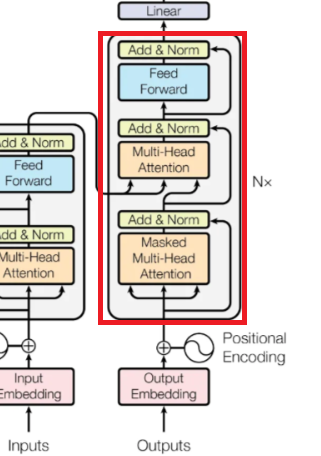

Durante o processo, o Decoder aplica o **Masked Multi-head Attention**, que mascara as palavras subsequentes da sequência em geração. Isso permite que o modelo gere as palavras uma de cada vez, garantindo causalidade. A entrada inicial é composta pelo token <sos>, enquanto o token <eos> marca o fim da sequência.

No final de cada camada, a saída do Decoder passa por uma camada linear, que projeta o vetor em um espaço de dimensão igual ao vocabulário. Por fim, o softmax converte essa projeção em uma distribuição de probabilidades, permitindo que o modelo selecione a palavra com a maior probabilidade para continuar a sequência.